<a href="https://colab.research.google.com/github/le3212/DG-method-code/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Basis Function - Legendre Polynomial (preparation)

第三題

In [41]:
import numpy as np
import scipy.special as sp
from numpy.polynomial.legendre import leggauss

def compute_integral_phi_phi_prime(n_intervals, poly_order):
    """
    計算積分矩陣 M_ij = ∫_{I^n} φ_j(t) φ_i'(t) dt，使用 Gauss-Legendre 積分。

    :param n_intervals: 區間數量 N
    :param poly_order: Legendre 多項式最高階數
    :return: 積分矩陣 (n_intervals, poly_order+1, poly_order+1)
    """
    # 1. 劃分整體區間 [0, 2] 為 n_intervals 個子區間，生成節點 x_nodes。
    x_nodes = np.linspace(0, 2, n_intervals + 1)  # 劃分區間節點
    # 初始化積分矩陣，矩陣大小為 (區間數量, 多項式階數+1, 多項式階數+1)
    M_matrix = np.zeros((n_intervals, poly_order + 1, poly_order + 1))

    # 2. 取得 Gauss-Legendre 積分點與對應權重
    gauss_x, gauss_w = leggauss(poly_order + 1)  # 使用 (poly_order+1) 個積分點與權重

    # 3. 對每個子區間逐一計算
    for k in range(n_intervals):
        # 取得當前區間 [x_k, x_{k+1}]
        x_k, x_kp1 = x_nodes[k], x_nodes[k + 1]
        h = x_kp1 - x_k  # 區間長度

        # 4. 計算積分，對每對 (i, j) 的組合
        for i in range(poly_order + 1):
            # 生成第 i 階 Legendre 多項式及其導數
            P_i = sp.legendre(i)  # P_i(x)
            dP_i = P_i.deriv()    # P_i'(x)

            for j in range(poly_order + 1):
                # 生成第 j 階 Legendre 多項式
                P_j = sp.legendre(j)  # P_j(x)

                # 初始化當前 i, j 在此區間上的積分值
                integral = 0.0

                # 5. Gauss-Legendre 積分
                for q in range(len(gauss_x)):
                    # 將 [-1, 1] 上的積分點對應回 [x_k, x_kp1]
                    xi = gauss_x[q]  # 標準區間 [-1,1] 上的節點
                    t = x_k + (xi + 1) * h / 2  # 映射至當前區間 [x_k, x_kp1]

                    # 計算基底函數及其導數值
                    phi_j = P_j(xi)  # φ_j(ξ)
                    phi_i_prime = (2 / h) * dP_i(xi)  # φ_i'(t) = (2/h) P_i'(ξ)

                    # 加權求和，累加積分值
                    integral += gauss_w[q] * phi_j * phi_i_prime

                # 最終結果乘以對應權重修正 h/2
                integral *= h / 2

                # 將結果存入積分矩陣
                M_matrix[k, i, j] = integral

    return M_matrix

# 設定參數
n_intervals = 4  # 劃分區間數量
poly_order = 3   # Legendre 多項式最高階數

# 計算積分矩陣
M_result = compute_integral_phi_phi_prime(n_intervals, poly_order)

# 顯示結果
print("積分矩陣 M_ij:")
for k in range(n_intervals):
    print(f"區間 {k+1}:")
    print(M_result[k])


積分矩陣 M_ij:
區間 1:
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.00000000e+00  5.55111512e-17 -3.05311332e-16  6.93889390e-17]
 [-1.11022302e-16  2.00000000e+00  0.00000000e+00 -3.33066907e-16]
 [ 2.00000000e+00  2.22044605e-16  2.00000000e+00 -2.77555756e-16]]
區間 2:
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.00000000e+00  5.55111512e-17 -3.05311332e-16  6.93889390e-17]
 [-1.11022302e-16  2.00000000e+00  0.00000000e+00 -3.33066907e-16]
 [ 2.00000000e+00  2.22044605e-16  2.00000000e+00 -2.77555756e-16]]
區間 3:
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.00000000e+00  5.55111512e-17 -3.05311332e-16  6.93889390e-17]
 [-1.11022302e-16  2.00000000e+00  0.00000000e+00 -3.33066907e-16]
 [ 2.00000000e+00  2.22044605e-16  2.00000000e+00 -2.77555756e-16]]
區間 4:
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.00000000e+00  5.55111512e-17 -3.05311332e-16  6.93889390e-17]
 [-1.11022302e-16  2.000

Basis Function - Legendre Polynomial (preparation)

第四題

In [42]:
import numpy as np
import scipy.special as sp
from numpy.polynomial.legendre import leggauss

def compute_integral_f_phi(n_intervals, poly_order, f):
    """
    計算 I_i^n = ∫_{I^n} f(t) φ_i(t) dt 使用 Gauss-Legendre 積分

    :param n_intervals: 區間數量
    :param poly_order: Legendre 多項式最高階數
    :param f: 目標函數 f(t)
    :return: I 矩陣 (n_intervals, poly_order+1)
    """
    # 劃分 [0, 2] 的區間，產生節點
    x_nodes = np.linspace(0, 2, n_intervals + 1)  # 劃分為 n_intervals 個區間
    I_matrix = np.zeros((n_intervals, poly_order + 1))  # 初始化積分結果矩陣

    # 使用 Gauss-Legendre 方法生成積分點與權重
    gauss_x, gauss_w = leggauss(poly_order + 1)  # poly_order+1 表示積分點數目

    for k in range(n_intervals):  # 對每個區間進行計算
        x_k, x_kp1 = x_nodes[k], x_nodes[k + 1]  # 取得區間起點與終點
        h = x_kp1 - x_k  # 區間長度

        # 將 Gauss-Legendre 積分點從標準區間 [-1, 1] 映射到當前區間 [x_k, x_kp1]
        t_values = 0.5 * h * (gauss_x + 1) + x_k  # 變換積分點至區間

        for i in range(poly_order + 1):  # 遍歷每個 Legendre 多項式基底
            P_i_values = sp.legendre(i)(gauss_x)  # 計算 φ_i(ξ)，ξ 為標準區間內的點
            # 使用 Gauss-Legendre 方法計算積分
            integral = np.sum(gauss_w * f(t_values) * P_i_values) * (h / 2)
            I_matrix[k, i] = integral  # 將結果存入矩陣

    return I_matrix

# 測試參數設定
n_intervals = 4  # 將 [0, 2] 劃分為 4 個區間
poly_order = 3   # 最高階為 3 的 Legendre 多項式
f = lambda t: np.sin(np.pi * t)  # 目標函數 f(t) = sin(πt)

# 計算積分結果
I_result = compute_integral_f_phi(n_intervals, poly_order, f)

# 顯示計算結果，並包含中文說明
print("積分結果 I_i^n:")
for k in range(n_intervals):
    print(f"區間 {k+1}: {I_result[k]}")  # 顯示每個區間對應的積分值


積分結果 I_i^n:
區間 1: [ 0.31830988  0.08697492 -0.01390858 -0.00158866]
區間 2: [ 0.31830988 -0.08697492 -0.01390858  0.00158866]
區間 3: [-0.31830988 -0.08697492  0.01390858  0.00158866]
區間 4: [-0.31830988  0.08697492  0.01390858 -0.00158866]


DG methods for solving ODE

第一題 計算L2誤差與收斂性








In [43]:
import numpy as np
from numpy.polynomial.legendre import leggauss      # 取得 Gauss–Legendre 積分點與權重
from scipy.special import eval_legendre             # 評價 Legendre 多項式 P_i(ξ)

def compute_dg_projection(f, N, p, quad_points=None):
    """
    計算 DG L2 正交投影係數 c_kn：
      c_kn[k,i] = (2*i+1)/h * ∫_{I_k} f(t) * φ_i(t) dt
    其中 φ_i(t)=P_i(ξ)，ξ = (2t-(t_k+t_{k+1}))/h
    """
    # 若未指定積分點數，至少用 p+1 點以保證對多項式精確
    if quad_points is None:
        quad_points = p + 1

    h = 2.0 / N           # 子區間長度
    coeffs = np.zeros((N, p+1))   # 用來存放 c_kn 的陣列
    xg, wg = leggauss(quad_points)  # 標準 [-1,1] 上的節點 xg 與權重 wg

    # 對每個子區間 I_k = [t0, t1] 做積分
    for k in range(N):
        t0, t1 = k*h, (k+1)*h   # 第 k 個子區間端點
        # 把 xg 映射到 [t0, t1] 上的積分點 t
        t = 0.5*(xg + 1)*(t1 - t0) + t0

        # 計算每個基底 φ_i 的投影係數
        for i in range(p+1):
            # 將 t 轉到標準座標 ξ ∈ [-1,1]
            xi = (2*t - (t1 + t0)) / h
            # 計算 P_i(ξ)
            Pi = eval_legendre(i, xi)
            # 利用 Gauss–Legendre 做數值積分：∫_{I_k} f(t)*φ_i(t) dt ≈ Σ wg * f(t)*Pi * (h/2)
            integral = np.dot(wg, f(t) * Pi) * 0.5 * h
            # 補上正交基底的範數因子 (2i+1)/h 得到最終 c_kn
            coeffs[k, i] = (2*i + 1) / h * integral

    return coeffs

def reconstruct_dg_solution(coeffs, N, p, num=100):
    """
    利用投影係數在每個子區間重建數值解 u_N(t)
    輸出全域等距取樣點 t_all 與對應的 u_all
    """
    h = 2.0 / N
    t_all, u_all = [], []

    for k in range(N):
        t0, t1 = k*h, (k+1)*h
        # 在子區間上取 num 個等距點
        ts = np.linspace(t0, t1, num)
        # 轉到 ξ 座標
        xi = (2*ts - (t1 + t0)) / h

        # φ_i(ξ) = P_i(ξ)，累加得到 u_N(ts)
        u = sum(coeffs[k, i] * eval_legendre(i, xi) for i in range(p+1))

        t_all.append(ts)
        u_all.append(u)

    # 把所有子區間的結果接成一條曲線
    return np.concatenate(t_all), np.concatenate(u_all)

def compute_L2_error(u_num, u_exact, t_vals):
    """
    計算 L2 誤差：
      ||u_num - u_exact|| = sqrt( ∫ (u_num(t)-u_exact(t))^2 dt )
    以 np.trapz 做數值積分
    """
    return np.sqrt(np.trapz((u_num - u_exact(t_vals))**2, t_vals))

# ---------------------- 主程式：測試不同 p 與 N 的收斂速率 ----------------------

# 精確解與 f(t)
u_exact = lambda t: np.exp(t)
f = u_exact

# 要測試的子區間數
Ns = [2, 4, 8, 16, 32, 64]

for p in [1, 2, 3]:  # p=1（線性）、p=2（二次）
    print(f"\n=== p = {p} 階，理論收斂階 p+1 = {p+1} ===")
    errors = []

    # 先計算各 N 的 L2 誤差
    for N in Ns:
        coeffs = compute_dg_projection(f, N, p)
        t_vals, u_vals = reconstruct_dg_solution(coeffs, N, p)
        err = compute_L2_error(u_vals, u_exact, t_vals)
        errors.append(err)
        print(f"N={N:>2}, L2 error = {err:.5e}")

    # 再計算相鄰 N 間的收斂速率
    for i in range(1, len(Ns)):
        rate = np.log(errors[i-1]/errors[i]) / np.log(2)
        print(f"  由 N={Ns[i-1]} → {Ns[i]}, 收斂階 ≈ {rate:.5f}")



=== p = 1 階，理論收斂階 p+1 = 2 ===
N= 2, L2 error = 1.82575e-01
N= 4, L2 error = 4.75675e-02
N= 8, L2 error = 1.20204e-02
N=16, L2 error = 3.01329e-03
N=32, L2 error = 7.53835e-04
N=64, L2 error = 1.88491e-04
  由 N=2 → 4, 收斂階 ≈ 1.94044
  由 N=4 → 8, 收斂階 ≈ 1.98449
  由 N=8 → 16, 收斂階 ≈ 1.99608
  由 N=16 → 32, 收斂階 ≈ 1.99902
  由 N=32 → 64, 收斂階 ≈ 1.99975

=== p = 2 階，理論收斂階 p+1 = 3 ===
N= 2, L2 error = 1.53340e-02
N= 4, L2 error = 2.00831e-03
N= 8, L2 error = 2.54096e-04
N=16, L2 error = 3.18592e-05
N=32, L2 error = 3.98546e-06
N=64, L2 error = 4.98277e-07
  由 N=2 → 4, 收斂階 ≈ 2.93269
  由 N=4 → 8, 收斂階 ≈ 2.98253
  由 N=8 → 16, 收斂階 ≈ 2.99559
  由 N=16 → 32, 收斂階 ≈ 2.99889
  由 N=32 → 64, 收斂階 ≈ 2.99972

=== p = 3 階，理論收斂階 p+1 = 4 ===
N= 2, L2 error = 9.63705e-04
N= 4, L2 error = 6.32956e-05
N= 8, L2 error = 4.00714e-06
N=16, L2 error = 2.51260e-07
N=32, L2 error = 1.57165e-08
N=64, L2 error = 9.82481e-10
  由 N=2 → 4, 收斂階 ≈ 3.92842
  由 N=4 → 8, 收斂階 ≈ 3.98146
  由 N=8 → 16, 收斂階 ≈ 3.99532
  由 N=16 → 32, 收斂階 ≈ 3.

<ipython-input-43-50fb7842f658>:68: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.sqrt(np.trapz((u_num - u_exact(t_vals))**2, t_vals))


第二題

計算L2誤差

節點誤差與收斂性

比較兩者與繪圖


=== p = 1 階 ===
N=2, L2 error = 1.82575e-01, Nodal error = 4.47232e-01
N=4, L2 error = 4.75675e-02, Nodal error = 1.30754e-01
N=8, L2 error = 1.20204e-02, Nodal error = 3.54382e-02
N=16, L2 error = 3.01329e-03, Nodal error = 9.23052e-03
N=32, L2 error = 7.53835e-04, Nodal error = 2.35583e-03
N=64, L2 error = 1.88491e-04, Nodal error = 5.95100e-04

=== p = 2 階 ===
N=2, L2 error = 1.53340e-02, Nodal error = 4.28308e-02
N=4, L2 error = 2.00831e-03, Nodal error = 6.40030e-03
N=8, L2 error = 2.54096e-04, Nodal error = 8.76682e-04
N=16, L2 error = 3.18592e-05, Nodal error = 1.14779e-04
N=32, L2 error = 3.98546e-06, Nodal error = 1.46855e-05
N=64, L2 error = 4.98277e-07, Nodal error = 1.85726e-06

=== p = 3 階 ===
N=2, L2 error = 9.63705e-04, Nodal error = 2.97894e-03
N=4, L2 error = 6.32956e-05, Nodal error = 2.25648e-04
N=8, L2 error = 4.00714e-06, Nodal error = 1.55559e-05
N=16, L2 error = 2.51260e-07, Nodal error = 1.02159e-06
N=32, L2 error = 1.57165e-08, Nodal error = 6.54576e-08
N=64, 

<ipython-input-44-6668433da632>:67: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.sqrt(np.trapz((u_num - u_exact(t_vals))**2, t_vals))  # 用數值積分計算誤差


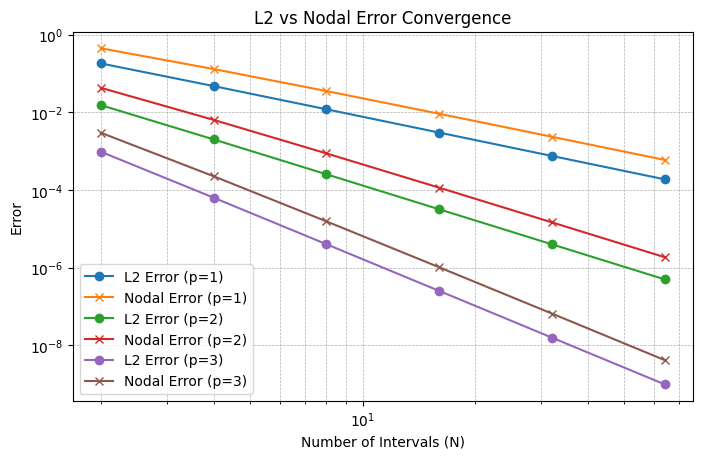

In [44]:
import numpy as np
from numpy.polynomial.legendre import leggauss      # 用於生成 Gauss-Legendre 積分點與權重
from scipy.special import eval_legendre             # 用於計算 Legendre 多項式 P_i(ξ)

def compute_dg_projection(f, N, p, quad_points=None):
    """
    計算 DG (Discontinuous Galerkin) 方法中的 L2 正交投影係數 c_kn。

    :param f: 被投影的函數
    :param N: 子區間數
    :param p: DG 方法的基底階數
    :param quad_points: 高斯積分點數，默認為 p+1
    :return: 投影係數矩陣 coeffs，形狀為 (N, p+1)
    """
    if quad_points is None:
        quad_points = p + 1  # 預設使用至少 p+1 個積分點，確保對多項式精確

    h = 2.0 / N  # 每個子區間的長度（假設區間為 [-1, 1]）
    coeffs = np.zeros((N, p+1))  # 初始化存放係數的陣列
    xg, wg = leggauss(quad_points)  # 在 [-1, 1] 上生成積分點與權重

    for k in range(N):
        t0, t1 = k * h, (k + 1) * h  # 第 k 個子區間的端點
        t = 0.5 * (xg + 1) * (t1 - t0) + t0  # 把積分點映射到 [t0, t1]

        for i in range(p + 1):
            xi = (2 * t - (t1 + t0)) / h  # 將物理座標 t 映射到標準區間 ξ
            Pi = eval_legendre(i, xi)  # 計算 Legendre 多項式 P_i(ξ)
            integral = np.dot(wg, f(t) * Pi) * 0.5 * h  # 使用 Gauss–Legendre 求積
            coeffs[k, i] = (2 * i + 1) / h * integral  # 計算正交投影係數

    return coeffs

def reconstruct_dg_solution(coeffs, N, p, num=100):
    """
    利用 DG 投影係數重建數值解 u_N(t)。

    :param coeffs: 投影係數
    :param N: 子區間數
    :param p: 基底階數
    :param num: 每個子區間內的取樣點數
    :return: 全域的取樣點 t_all 與數值解 u_all
    """
    h = 2.0 / N  # 子區間長度
    t_all, u_all = [], []  # 儲存所有子區間的取樣結果

    for k in range(N):
        t0, t1 = k * h, (k + 1) * h  # 第 k 個子區間的端點
        ts = np.linspace(t0, t1, num)  # 子區間內的取樣點
        xi = (2 * ts - (t1 + t0)) / h  # 轉換到標準區間

        u = sum(coeffs[k, i] * eval_legendre(i, xi) for i in range(p + 1))  # 重建數值解
        t_all.append(ts)  # 儲存取樣點
        u_all.append(u)  # 儲存對應的數值解

    return np.concatenate(t_all), np.concatenate(u_all)  # 拼接所有子區間結果

def compute_L2_error(u_num, u_exact, t_vals):
    """
    計算 L2 誤差：||u_num - u_exact||。

    :param u_num: 數值解
    :param u_exact: 精確解（函數）
    :param t_vals: 評估誤差的取樣點
    :return: L2 誤差
    """
    return np.sqrt(np.trapz((u_num - u_exact(t_vals))**2, t_vals))  # 用數值積分計算誤差

def compute_nodal_error(u_num, u_exact, t_vals):
    """
    計算節點誤差（每個節點上數值解與精確解的最大差異）。

    :param u_num: 數值解
    :param u_exact: 精確解（函數）
    :param t_vals: 節點取樣點
    :return: Nodal 誤差
    """
    return np.max(np.abs(u_num - u_exact(t_vals)))  # 節點誤差為最大絕對差

# 主程式部分略

# ---------------------- 主程式：測試不同 p 與 N 的收斂速率 ----------------------

u_exact = lambda t: np.exp(t)
f = u_exact
Ns = [2, 4, 8, 16, 32, 64]
errors_L2 = {}
errors_nodal = {}

for p in [1, 2, 3]:
    errors_L2[p] = []
    errors_nodal[p] = []
    print(f"\n=== p = {p} 階 ===")
    for N in Ns:
        coeffs = compute_dg_projection(f, N, p)
        t_vals, u_vals = reconstruct_dg_solution(coeffs, N, p)
        err_L2 = compute_L2_error(u_vals, u_exact, t_vals)
        err_nodal = compute_nodal_error(u_vals, u_exact, t_vals)

        errors_L2[p].append(err_L2)
        errors_nodal[p].append(err_nodal)
        print(f"N={N}, L2 error = {err_L2:.5e}, Nodal error = {err_nodal:.5e}")

# ---------------------- 繪圖 ----------------------
plt.figure(figsize=(8, 4.8))

for p in [1, 2, 3]:
    plt.loglog(Ns, errors_L2[p], label=f"L2 Error (p={p})", marker='o')
    plt.loglog(Ns, errors_nodal[p], label=f"Nodal Error (p={p})", marker='x')

plt.xlabel("Number of Intervals (N)")
plt.ylabel("Error")
plt.title("L2 vs Nodal Error Convergence")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


計算Nodal errors 的 rate of convergence

In [45]:
import numpy as np

# Nodal error values for p=1, p=2, p=3
nodal_errors = {
    1: [4.47232e-01, 1.30754e-01, 3.54382e-02, 9.23052e-03, 2.35583e-03, 5.95100e-04],
    2: [4.28308e-02, 6.40030e-03, 8.76682e-04, 1.14779e-04, 1.46855e-05, 1.85726e-06],
    3: [2.97894e-03, 2.25648e-04, 1.55559e-05, 1.02159e-06, 6.54576e-08, 4.14245e-09]
}

# Calculate rate of convergence
roc = {p: [] for p in nodal_errors}
for p, errors in nodal_errors.items():
    for i in range(len(errors) - 1):
        rate = np.log(errors[i] / errors[i + 1]) / np.log(2)
        roc[p].append(rate)

roc


{1: [np.float64(1.7741683366968832),
  np.float64(1.8834778492171955),
  np.float64(1.9408214981651435),
  np.float64(1.970176488150466),
  np.float64(1.9850314131103215)],
 2: [np.float64(2.7424371893810164),
  np.float64(2.868013997832601),
  np.float64(2.9331949166691653),
  np.float64(2.966394418920408),
  np.float64(2.9831446871199474)],
 3: [np.float64(3.722653169402168),
  np.float64(3.858540220713636),
  np.float64(3.928573652372014),
  np.float64(3.9641117909391768),
  np.float64(3.98200451788628)]}